# Coronavirus Analysis

<img src='https://bolnews.s3.amazonaws.com/wp-content/uploads/2020/01/Coranavirus-2.jpg1000-x-500.jpg' width='600' height='500' >

### How Coronavirus Started

The virus appears to have originated from a Wuhan seafood market where wild animals, including marmots, birds, rabbits, bats and snakes, are traded illegally. Coronaviruses are known to jump from animals to humans, so it’s thought that the first people infected with the disease – a group primarily made up of stallholders from the seafood market – contracted it from contact with animals.

Although an initial analysis of the virus suggested it was similar to coronavirus seen in snakes, it now seems more likely that it came from bats. A team of virologists at the Wuhan Institute for Virology released a detailed paper showing that the new coronaviruses' genetic makeup is 96 per cent identical to that of a coronavirus found in bats. Bats were also the original source of the Sars virus.

src= 'https://www.wired.co.uk/article/china-coronavirus'

Coronaviruses are a group of viruses that cause diseases in mammals and birds. In humans, the viruses cause respiratory infections which are typically mild including the common cold but rarer forms like SARS and MERS can be lethal. In cows and pigs they may cause diarrhea, while in chickens they can cause an upper respiratory disease. There are no vaccines or antiviral drugs that are approved for prevention or treatment.

Coronaviruses are viruses in the subfamily Orthocoronavirinae in the family Coronaviridae, in the order Nidovirales.Coronaviruses are enveloped viruses with a positive-sense single-stranded RNA genome and with a nucleocapsid of helical symmetry. The genomic size of coronaviruses ranges from approximately 26 to 32 kilobases, the largest for an RNA virus.

The name "coronavirus" is derived from the Latin corona, meaning crown or halo, which refers to the characteristic appearance of the virus particles (virions): they have a fringe reminiscent of a royal crown or of the solar corona.
    
Source -> https://en.wikipedia.org/wiki/Coronavirus

### Import Libraries

In [212]:
import numpy as np
import pandas as pa
import matplotlib.pyplot as plt
import seaborn as sn

#Import Plotly
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go

%matplotlib inline
import squarify
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 32}

matplotlib.rcParams.update({'font.size': 30})

import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [213]:
original_data = pa.read_csv('2019_nCoV_20200121_20200128.csv')
data = original_data

In [214]:
for i in data[data['Province/State'].isna()].index:
    data.loc[i,'Province/State'] = 'Other' + ' ' + str(data.loc[i,'Country/Region'])

data = data.fillna(0)

data['Province/State'] = data['Province/State'].astype('category')
data['Country/Region'] = data['Country/Region'].astype('category')
data['Last Update'] = pa.to_datetime(data['Last Update'])

In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 7 columns):
Province/State    669 non-null category
Country/Region    669 non-null category
Last Update       669 non-null datetime64[ns]
Confirmed         669 non-null float64
Suspected         669 non-null float64
Recovered         669 non-null float64
Death             669 non-null float64
dtypes: category(2), datetime64[ns](1), float64(4)
memory usage: 31.3 KB


In [216]:
data.head()

,Province/State,Country/Region,Last Update,Confirmed,Suspected,Recovered,Death
0,Hubei,Mainland China,2020-01-28 18:00:00,3554.0,0.0,80.0,125.0
1,Guangdong,Mainland China,2020-01-28 18:00:00,207.0,0.0,4.0,0.0
2,Zhejiang,Mainland China,2020-01-28 18:00:00,173.0,0.0,3.0,0.0
3,Henan,Mainland China,2020-01-28 18:00:00,168.0,0.0,0.0,1.0
4,Hunan,Mainland China,2020-01-28 18:00:00,143.0,0.0,0.0,0.0


In [217]:
'''country_count = data['Country/Region'].value_counts()
country = pa.DataFrame({'Name':country_count.index,'Values':country_count.values})
names = []
for values in country_count.index:
    if ((values == 'Mainland China') | (values == 'Cambodia') |(values == 'South Korea') | (values == 'Hong Kong')| (values == 'Japan' ) | (values == 'Thailand')|(values == 'Taiwan') | (values == 'Macau') | (values =='Singapore')|(values =='Vietnam')|(values =='Malaysia')|(values =='Philippines')|(values =='Nepal') | (values =='Sri Lanka')):
        names.append('Asia')
    if (( values == 'United States') | ( values == 'Mexico' ) | ( values =='Colombia') | ( values == 'Brazil') | ( values == 'Canada')):
        names.append('America')
    if (( values == 'France') | ( values == 'Germany' )):  
        names.append('Europe') 
    if (( values == 'Ivory Coast')):
        names.append('Africa')
    if (( values == 'Australia' )):
        names.append('Oceania')

country['Continent'] = names'''

"country_count = data['Country/Region'].value_counts()\ncountry = pa.DataFrame({'Name':country_count.index,'Values':country_count.values})\nnames = []\nfor values in country_count.index:\n    if ((values == 'Mainland China') | (values == 'Cambodia') |(values == 'South Korea') | (values == 'Hong Kong')| (values == 'Japan' ) | (values == 'Thailand')|(values == 'Taiwan') | (values == 'Macau') | (values =='Singapore')|(values =='Vietnam')|(values =='Malaysia')|(values =='Philippines')|(values =='Nepal') | (values =='Sri Lanka')):\n        names.append('Asia')\n    if (( values == 'United States') | ( values == 'Mexico' ) | ( values =='Colombia') | ( values == 'Brazil') | ( values == 'Canada')):\n        names.append('America')\n    if (( values == 'France') | ( values == 'Germany' )):  \n        names.append('Europe') \n    if (( values == 'Ivory Coast')):\n        names.append('Africa')\n    if (( values == 'Australia' )):\n        names.append('Oceania')\n\ncountry['Continent'] = names"

#### Frequencies Country/Region

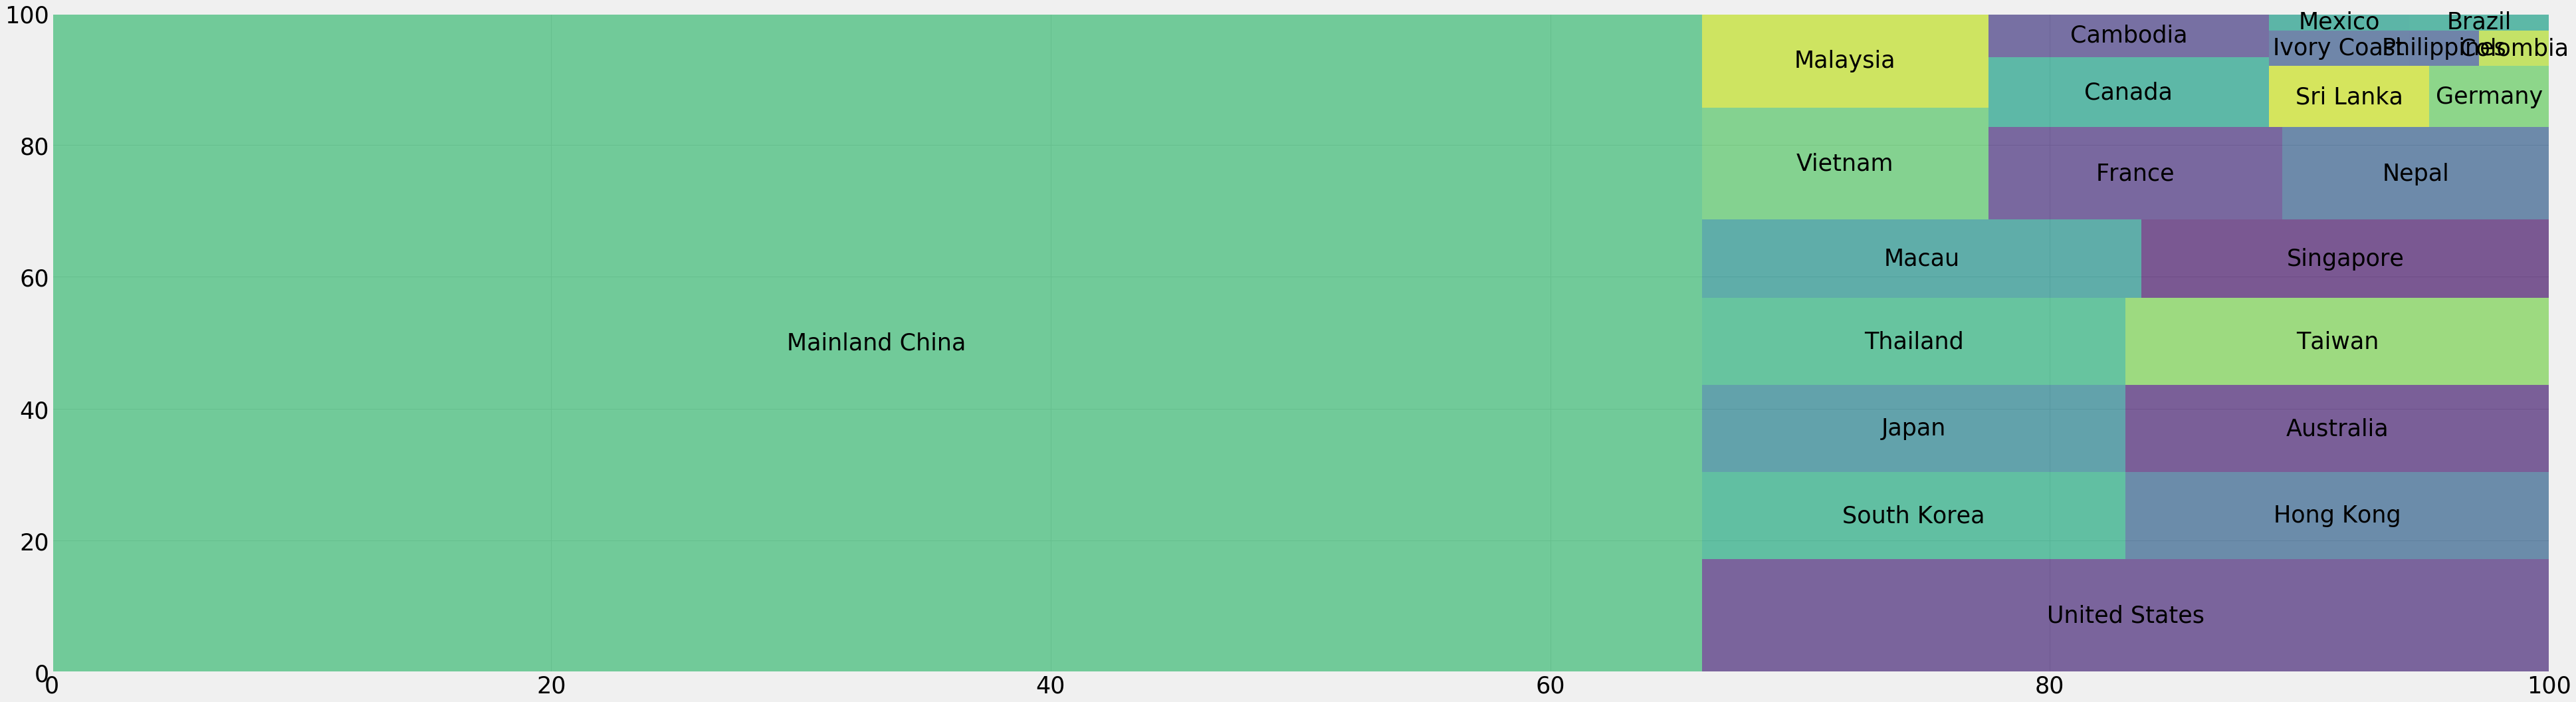

In [218]:
matplotlib.rcParams.update({'font.size': 35})

plt.figure(figsize=(60,17))
country_count = data['Country/Region'].value_counts()
squarify.plot(sizes=country_count.values,label=country_count.index,alpha=0.7)

Coranavirus is mostly common in China as compared to other countries. 

In [219]:
data = data[data['Last Update'] == '2020-01-28 18:00:00']

In [220]:
data_province = data.groupby('Province/State').sum()
data_province = data_province[data_province['Confirmed'] > 0].sort_values(by=['Confirmed'],ascending=False)

fig = go.Figure(go.Bar(x=data_province['Confirmed'],
                       y=data_province.index,
                       orientation='h',
        marker={
        'color': [np.random.randint(10,255) for x in range(0,len(data_province))],
        'colorscale': 'Viridis'
        }
        ))

fig.update_layout(yaxis=dict(title='States'),width=900,height=500,title='Total Confirmed Coronavirus cases over States',
                 xaxis=dict(title='Confirmed'))
fig.show()

Coronavirus found or Confirmed in people are mostly common in places like Hubei,Henan, Jiagxi,Beijing and Jiangsu.

In [221]:
data_province = data.groupby('Province/State').sum()
data_province = data_province[data_province['Recovered'] > 0].sort_values(by=['Recovered'],ascending=False)

fig = go.Figure(go.Bar(x=data_province['Recovered'],
                       y=data_province.index,
                       orientation='h',
        marker={
        'color': [np.random.randint(10,255) for x in range(0,len(data_province))],
        'colorscale': 'Viridis'
        }
        ))

fig.update_layout(yaxis=dict(title='States'),width=900,height=500,title='Total Recovered Coronavirus cases over States',
                 xaxis=dict(title='Recovered'))
fig.show()

### Death Percentage over state and country

In [222]:
fig_c = go.Pie(labels=data['Country/Region'],values=data['Death'], textinfo='label+percent',hole=0.4,domain={'x': [0,0.40]})

fig_s = go.Pie(labels=data_province.index,values=data_province['Death'], textinfo='label+percent',hole=0.4,
               domain={'x': [0.46,1]})

layout = dict(font=dict(size=10), legend=dict(orientation="v"),
              annotations = [dict(x=0.14, y=0.5, text='Country', showarrow=False, font=dict(size=20)),
                             dict(x=0.77, y=0.5, text='State', showarrow=False, font=dict(size=20)) ])


fig = dict(data=[fig_s, fig_c],layout=layout)
py.iplot(fig)

All Peoples died due to coranavirus are from China and states is Hubei (In Hubei 125 people died due to this virus which is almost 98.4% compared to other states)

### Country Confirmed and Recovered Coronavirus excluding China

In [223]:
data_other_country = data[data['Country/Region']!= 'Mainland China']

fig_c = go.Pie(labels=data_other_country['Country/Region'],values=data_other_country['Confirmed'], textinfo='label+percent',
               hole=0.4,domain={'x': [0,0.40]})

fig_s = go.Pie(labels=data_other_country['Country/Region'],values=data_other_country['Recovered'], 
               textinfo='label+percent',hole=0.4,
               domain={'x': [0.46,1]})

layout = dict(font=dict(size=10), legend=dict(orientation="v"),
              annotations = [dict(x=0.13, y=0.5, text='Confirmed', showarrow=False, font=dict(size=20)),
                             dict(x=0.80, y=0.5, text='Recovered', showarrow=False, font=dict(size=20)) ])


fig = dict(data=[fig_s, fig_c],layout=layout)
py.iplot(fig)

From the first plot we can see that all the states that accumulated number of confirmed cases is more in Thailand,Taiwan,Hong Kong,Japan,Singapore,Macau the regions which falls under china or the neghiboring countries of china.

#### Analysis China Recovered and Confirmed and Death accross all state of china

In [224]:
data_cn = data.groupby('Country/Region')['Recovered','Death'].sum()
data_cn.loc['Mainland China']
#sn.barplot(x = data_cn.loc['Mainland China'].index,y=data_cn.loc['Mainland China'].values)

fig = go.Figure(go.Bar(y=data_cn.loc['Mainland China'].values,
                       x=data_cn.loc['Mainland China'].index,
                       orientation='v',
        marker={
        'color': [np.random.randint(0,225) for x in range(0,2)]
        
        }
        ))

fig.update_layout(yaxis=dict(title='Values'),width=900,height=500,title='Total number of recovered and deaths cases in China',
                 xaxis=dict(title='Status'))

fig.show()

The number of deaths is more than recovered cases

In [225]:
data_chinac = data_china[(data_china['Recovered']!= 0) | (data_china['Death']!=0.0)]

st = data_chinac['Province/State']
rec = data_chinac['Recovered']
de = data_chinac['Death']

fig = go.Figure()

fig.add_trace(go.Scatter(y=rec, x=st,name='Recovered'))
fig.add_trace(go.Bar(x=st,
                       y=rec,showlegend=False,
                       orientation='v'))


fig.add_trace(go.Scatter(x=st, y=de,name='Death'))
fig.add_trace(go.Bar(x=st,
                       y=de,showlegend=False,
                       orientation='v'))

fig.update_layout(yaxis=dict(title='Recovered & Death'),width=900,height=500,
                  title="Analysis of China's Recovered and Death cases",
                  xaxis=dict(title='Status'))

fig.show()

Hubei has the most number of recovered and deaths as compared to others.

There's currently a severe shortage of medical supplies, not just in Wuhan but in surrounding cities as well, the governor of Hubei Province, Wang Xiaodong said at a press conference on Wednesday.
The mask shortage has become a country-wide problem since the new coronavirus outbreak spread domestically. Everyone who goes outside is suggested to wear mask. But the problem is it's hard to get one. Besides experts suggested the use of normal surgical masks, people have to replace it every four hours.

Source - https://news.cgtn.com/news/2020-01-30/Hubei-has-a-severe-shortage-of-medical-supplies-says-governor-NFDtX4DR7i/index.html

In [226]:
data_china = data[data['Country/Region'] == 'Mainland China']
data_china_val = data_china.groupby(['Country/Region']).sum() 

values = data_china_val.loc['Mainland China'].values

fig = go.Figure(go.Bar(y=values,
                       x=['Confirmed','Suspected','Recovered','Death'],
                       orientation='v',
        marker={
        'color': [np.random.randint(100,255) for x in range(0,len(values))],
        'colorscale': 'Viridis'
        }
        ))

fig.update_layout(yaxis=dict(title='Values'),width=900,height=500,
                  title='Analysis China Recovered and Confirmed and Death',
                  xaxis=dict(title='Status'))
fig.show()

####  Confirmed cases in Province/State in China

In [227]:
fig = go.Figure(go.Treemap(
    
    labels = data_china['Province/State'],
    values = data_china.Confirmed,
    parents = data_china['Country/Region']
))

fig.show()

### Analysing Hubei

In [228]:
z = original_data[original_data['Province/State'] == 'Hubei']
z = z.fillna(0)

In [229]:
import plotly.express as px
fig = go.Figure()

fig.add_trace(go.Scatter(x=z['Last Update'], y=z['Confirmed'],name="Confirmed"))
fig.add_trace(go.Bar(x=z['Last Update'],
                       y=z['Confirmed'],
                       showlegend=False,
                       orientation='v'))


fig.add_trace(go.Scatter(x=z['Last Update'], y=z['Recovered'],name="Recovered"))
fig.add_trace(go.Bar(x=z['Last Update'],
                       y=z['Recovered'],
                       showlegend=False,
                       orientation='v'))

fig.add_trace(go.Scatter(x=z['Last Update'], y=z['Death'],name="Death"))
fig.add_trace(go.Bar(x=z['Last Update'],
                       y=z['Death'],
                       showlegend=False,
                       orientation='v'))

fig.add_trace(go.Scatter(x=z['Last Update'], y=z['Suspected'],name="Suspected"))
fig.add_trace(go.Bar(x=z['Last Update'],
                       y=z['Suspected'],
                       showlegend=False,
                       orientation='v'))

fig.update_layout(yaxis=dict(title='Values'),width=900,height=500,
                  title='Analysis of Death/Recovered/Confirmed in Hubei with time',
                  xaxis=dict(title='Time in Date'))

The number of victims of this virus is increasing in hubei as it it can be seen clearly from the above plot,the main place from where this virus originated is Wuhan which is the capital of  capital of Central China’s Hubei province.  

In [230]:
data_country = data.groupby('Country/Region')['Confirmed'].sum()

worldmap = [dict(type = 'choropleth', locations = data_country.index, locationmode = 'country names',
                 z = data_country.values, colorscale = "Inferno", reversescale = True, 
                 marker = dict(line = dict( width = 0.5)), 
                 colorbar = dict(autotick = True, title = 'Number of Confirmed cases'))]

layout = dict(title = 'Coronavirus across all over the world', geo = dict(showframe = False, showcoastlines = True, 
                                                                projection = dict(type = 'Mercator')))

fig = dict(data=worldmap, layout=layout)
py.iplot(fig, validate=False)